In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/train_loan_preprocess.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
d=df.select_dtypes(['int','float64'])
d

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


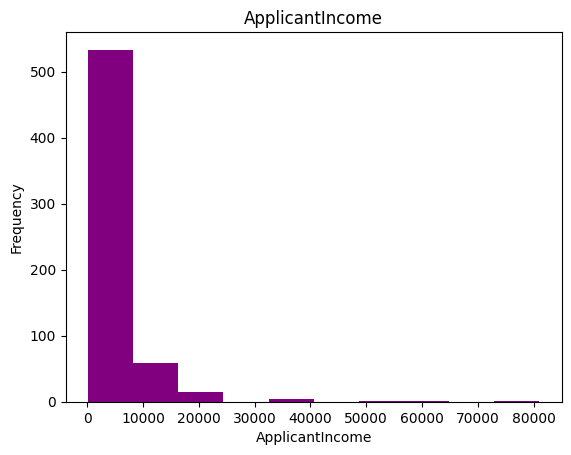

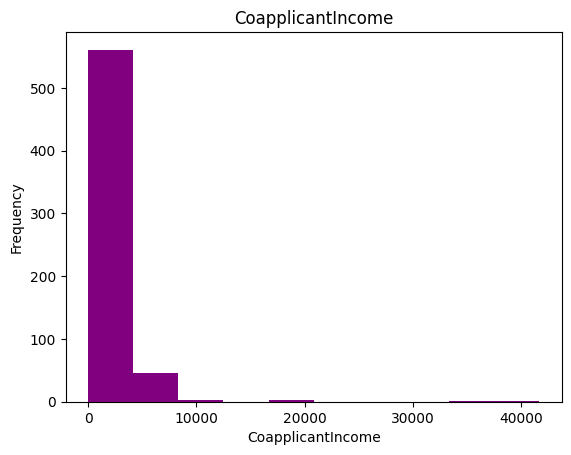

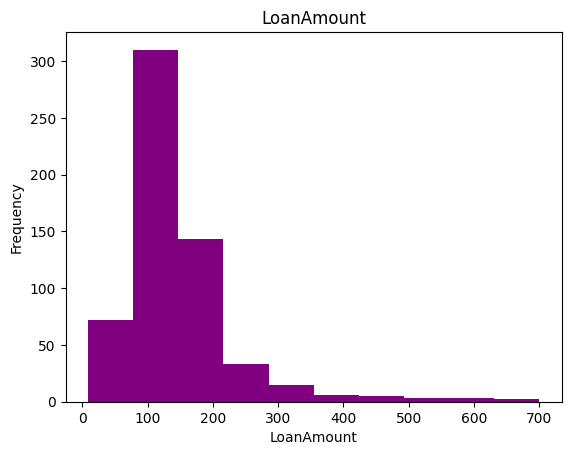

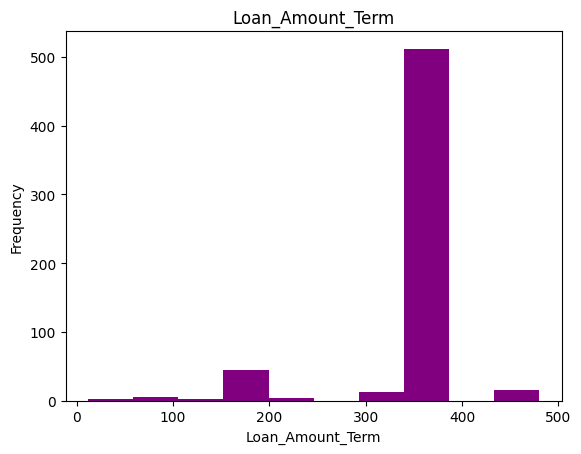

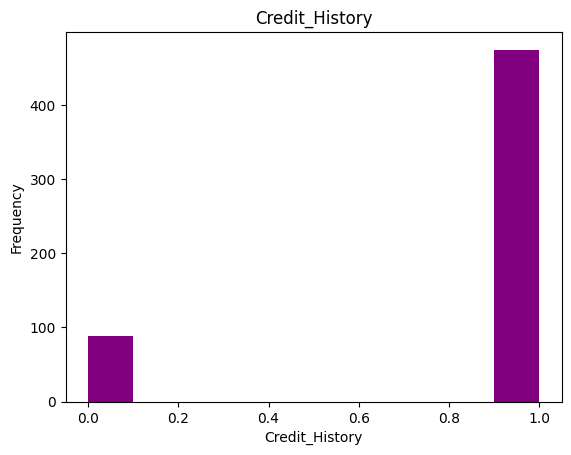

In [7]:
c=d.columns
for i in range(0,(d.columns.size)):
  plt.hist(d[c[i]],color='purple')
  plt.title(c[i])
  plt.xlabel(c[i])
  plt.ylabel('Frequency')
  plt.show()

In [8]:
rep_values={'Dependents':df.Dependents.mode()[0],'Gender':df.Gender.mode()[0],'Married':df.Married.mode()[0],'Self_Employed':df.Self_Employed.mode()[0],'LoanAmount':df.LoanAmount.median(),'Loan_Amount_Term':df.Loan_Amount_Term.median(),'Credit_History':df.Credit_History.median()}
df.fillna(rep_values,inplace=True)
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Outlier detection**

In [9]:
d=df.select_dtypes(['int','float64'])
d

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


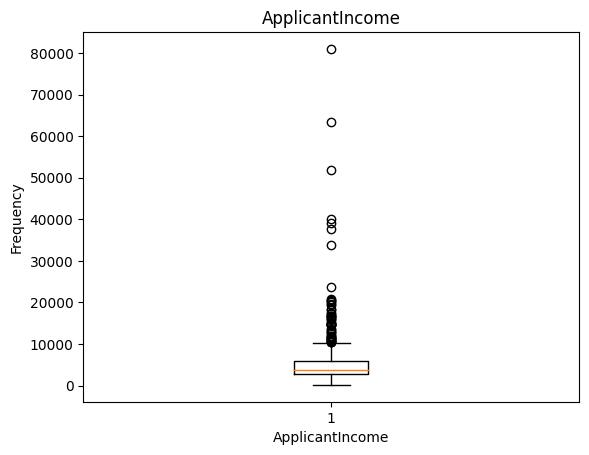

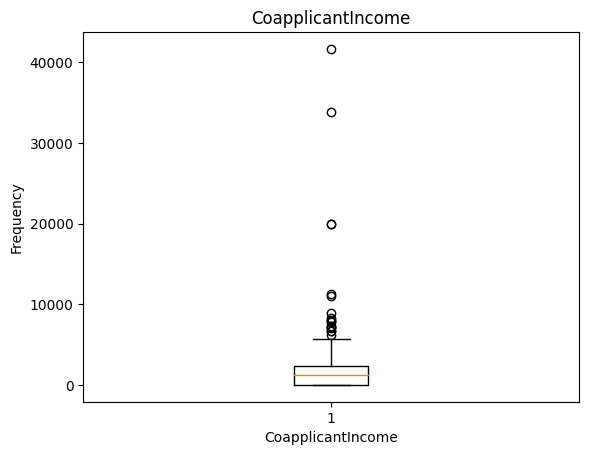

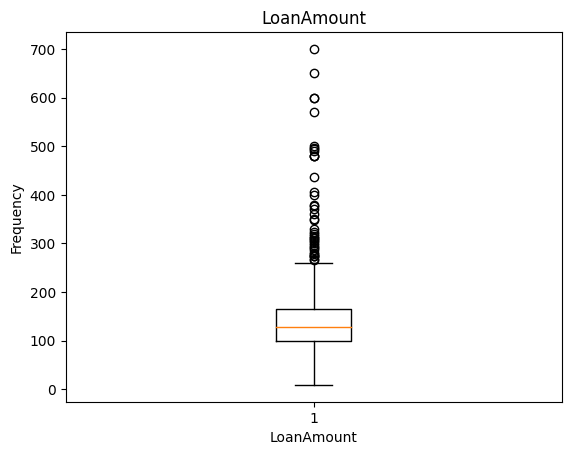

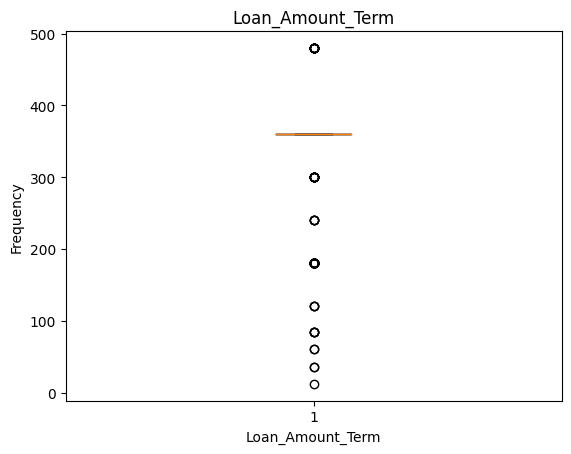

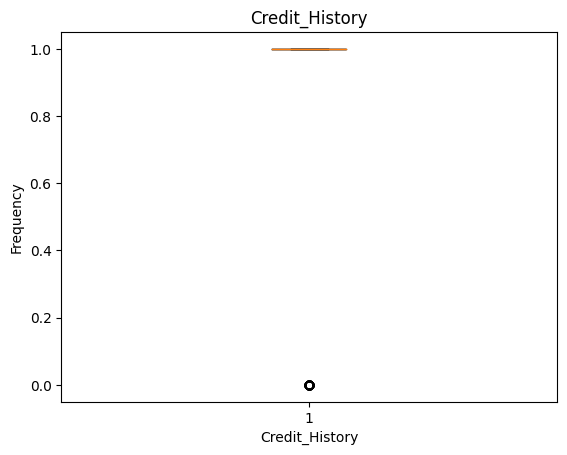

In [10]:
for i in range(0,(d.columns.size)):
  plt.boxplot(d[c[i]])
  plt.title(c[i])
  plt.xlabel(c[i])
  plt.ylabel('Frequency')
  plt.show()

# **Clipping**

In [11]:
q1=np.percentile(df['ApplicantIncome'],25,interpolation='midpoint')
q2=np.percentile(df['ApplicantIncome'],50,interpolation='midpoint')
q3=np.percentile(df['ApplicantIncome'],75,interpolation='midpoint')
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print("max value : ",upper)
print("min value : ",lower)

outlies=[]
for x in df['ApplicantIncome']:
  if((x>upper) or (x<lower)):
    outlies.append(x)
print(outlies)
df['ApplicantIncome']=df['ApplicantIncome'].clip(lower,upper)

max value :  10156.5
min value :  -1487.5
[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]


In [12]:
q1=np.percentile(df['CoapplicantIncome'],25,interpolation='midpoint')
q2=np.percentile(df['CoapplicantIncome'],50,interpolation='midpoint')
q3=np.percentile(df['CoapplicantIncome'],75,interpolation='midpoint')
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print("max value : ",upper)
print("min value : ",lower)

outlies=[]
for x in df['CoapplicantIncome']:
  if((x>upper) or (x<lower)):
    outlies.append(x)
print(outlies)
df['CoapplicantIncome']=df['CoapplicantIncome'].clip(lower,upper)

max value :  5731.25
min value :  -3438.75
[10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]


In [13]:
q1=np.percentile(df['LoanAmount'],25,interpolation='midpoint')
q2=np.percentile(df['LoanAmount'],50,interpolation='midpoint')
q3=np.percentile(df['LoanAmount'],75,interpolation='midpoint')
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print("max value : ",upper)
print("min value : ",lower)

outlies=[]
for x in df['LoanAmount']:
  if((x>upper) or (x<lower)):
    outlies.append(x)
print(outlies)
df['LoanAmount']=df['LoanAmount'].clip(lower,upper)

max value :  260.5
min value :  4.5
[267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [14]:
q1=np.percentile(df['Loan_Amount_Term'],25,interpolation='midpoint')
q2=np.percentile(df['Loan_Amount_Term'],50,interpolation='midpoint')
q3=np.percentile(df['Loan_Amount_Term'],75,interpolation='midpoint')
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print("max value : ",upper)
print("min value : ",lower)

outlies=[]
for x in df['Loan_Amount_Term']:
  if((x>upper) or (x<lower)):
    outlies.append(x)
print(outlies)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].clip(lower,upper)

max value :  360.0
min value :  360.0
[120.0, 240.0, 180.0, 180.0, 60.0, 300.0, 480.0, 300.0, 240.0, 180.0, 120.0, 180.0, 180.0, 480.0, 180.0, 180.0, 480.0, 120.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 180.0, 480.0, 180.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 60.0, 180.0, 180.0, 480.0, 180.0, 36.0, 180.0, 300.0, 480.0, 480.0, 84.0, 180.0, 180.0, 180.0, 180.0, 480.0, 300.0, 480.0, 300.0, 180.0, 180.0, 480.0, 180.0, 180.0, 180.0, 300.0, 300.0, 180.0, 240.0, 300.0, 300.0, 180.0, 180.0, 180.0, 180.0, 300.0, 84.0, 12.0, 480.0, 300.0, 180.0, 480.0, 180.0, 180.0, 36.0, 180.0, 480.0, 84.0, 84.0, 180.0, 240.0, 180.0, 180.0, 180.0, 180.0]


In [15]:
q1=np.percentile(df['Credit_History'],25,interpolation='midpoint')
q2=np.percentile(df['Credit_History'],50,interpolation='midpoint')
q3=np.percentile(df['Credit_History'],75,interpolation='midpoint')
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print("max value : ",upper)
print("min value : ",lower)

outlies=[]
for x in df['Credit_History']:
  if((x>upper) or (x<lower)):
    outlies.append(x)
print(outlies)
df['Credit_History']=df['Credit_History'].clip(lower,upper)

max value :  1.0
min value :  1.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
d=df.select_dtypes(['int','float64'])
d

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,360.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


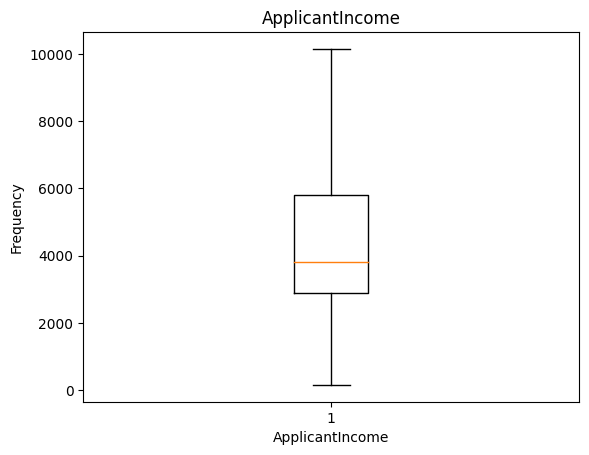

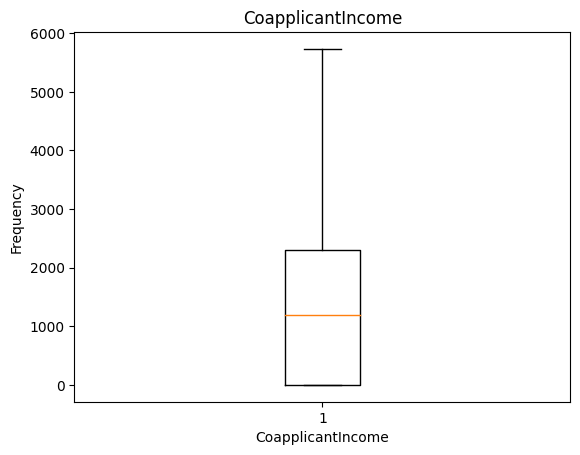

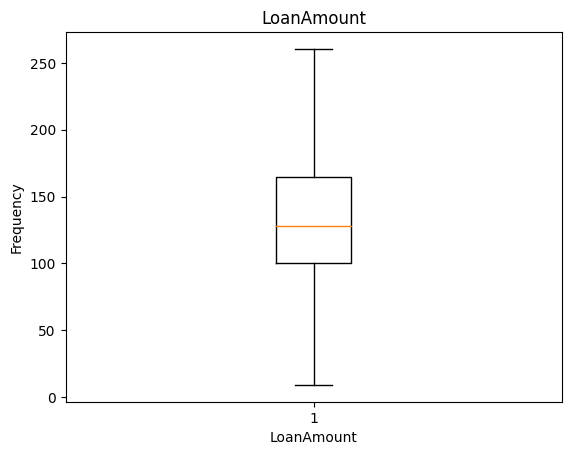

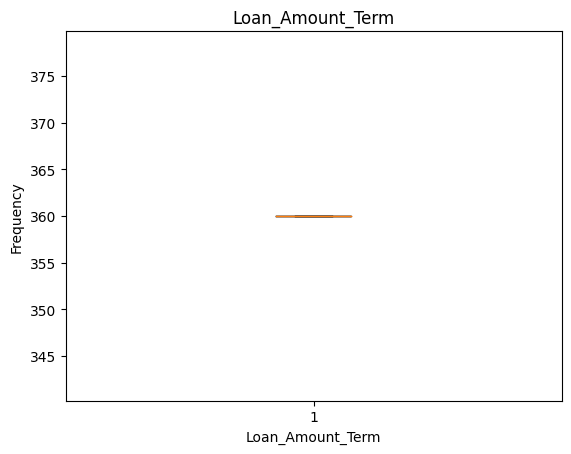

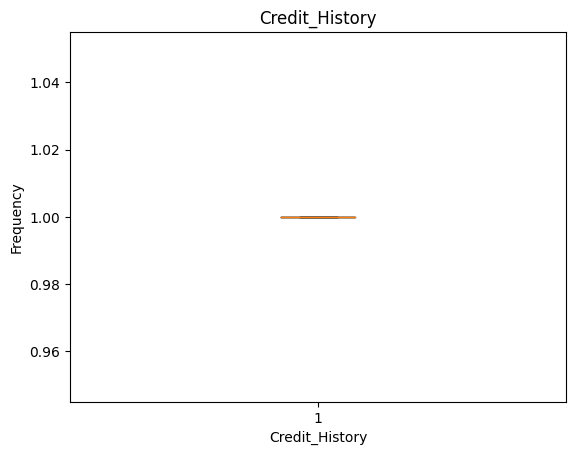

In [17]:
for i in range(0,(d.columns.size)):
  plt.boxplot(d[c[i]])
  plt.title(c[i])
  plt.xlabel(c[i])
  plt.ylabel('Frequency')
  plt.show()

# **Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler


In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
label_encoder=LabelEncoder()
df['Loan_ID']=label_encoder.fit_transform(df['Loan_ID'])

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
one_hot_encoder=OneHotEncoder()
gender_enc=one_hot_encoder.fit_transform(df[['Gender']])

In [23]:
one_hot_df=pd.DataFrame(gender_enc.toarray(),columns=['Male','Female'])
df=pd.concat([df,one_hot_df],axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Female
0,0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,0.0,1.0
1,1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0
2,2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,0.0,1.0
3,3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,0.0,1.0
4,4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,0.0,1.0


In [24]:
df=pd.get_dummies(df,columns=['Married','Education','Self_Employed','Property_Area','Loan_Status'],dtype=int)
df.head()

,Loan_ID,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Female,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,Male,0,5849.0,0.0,128.0,360.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1
1,1,Male,1,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,...,1,1,0,1,0,1,0,0,1,0
2,2,Male,0,3000.0,0.0,66.0,360.0,1.0,0.0,1.0,...,1,1,0,0,1,0,0,1,0,1
3,3,Male,0,2583.0,2358.0,120.0,360.0,1.0,0.0,1.0,...,1,0,1,1,0,0,0,1,0,1
4,4,Male,0,6000.0,0.0,141.0,360.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1


# **Scaling**
**MIN MAX scaling**

In [25]:
minmax_scale=MinMaxScaler()
df['ApplicantIncome']=minmax_scale.fit_transform(df[['ApplicantIncome']])
df.head()

,Loan_ID,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Female,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,Male,0,0.569530,0.0,128.0,360.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1
1,1,Male,1,0.443012,1508.0,128.0,360.0,1.0,0.0,1.0,...,1,1,0,1,0,1,0,0,1,0
2,2,Male,0,0.284815,0.0,66.0,360.0,1.0,0.0,1.0,...,1,1,0,0,1,0,0,1,0,1
3,3,Male,0,0.243142,2358.0,120.0,360.0,1.0,0.0,1.0,...,1,0,1,1,0,0,0,1,0,1
4,4,Male,0,0.584620,0.0,141.0,360.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1


In [26]:
df['CoapplicantIncome']=minmax_scale.fit_transform(df[['CoapplicantIncome']])
df.head()

,Loan_ID,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Female,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,Male,0,0.569530,0.000000,128.0,360.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1
1,1,Male,1,0.443012,0.263119,128.0,360.0,1.0,0.0,1.0,...,1,1,0,1,0,1,0,0,1,0
2,2,Male,0,0.284815,0.000000,66.0,360.0,1.0,0.0,1.0,...,1,1,0,0,1,0,0,1,0,1
3,3,Male,0,0.243142,0.411429,120.0,360.0,1.0,0.0,1.0,...,1,0,1,1,0,0,0,1,0,1
4,4,Male,0,0.584620,0.000000,141.0,360.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1


In [27]:
df['LoanAmount']=minmax_scale.fit_transform(df[['LoanAmount']])
df.head()

,Loan_ID,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Female,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,Male,0,0.569530,0.000000,0.473161,360.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1
1,1,Male,1,0.443012,0.263119,0.473161,360.0,1.0,0.0,1.0,...,1,1,0,1,0,1,0,0,1,0
2,2,Male,0,0.284815,0.000000,0.226640,360.0,1.0,0.0,1.0,...,1,1,0,0,1,0,0,1,0,1
3,3,Male,0,0.243142,0.411429,0.441352,360.0,1.0,0.0,1.0,...,1,0,1,1,0,0,0,1,0,1
4,4,Male,0,0.584620,0.000000,0.524851,360.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1


In [28]:
df['Loan_Amount_Term']=minmax_scale.fit_transform(df[['Loan_Amount_Term']])
df.head()

,Loan_ID,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Female,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,Male,0,0.569530,0.000000,0.473161,0.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1
1,1,Male,1,0.443012,0.263119,0.473161,0.0,1.0,0.0,1.0,...,1,1,0,1,0,1,0,0,1,0
2,2,Male,0,0.284815,0.000000,0.226640,0.0,1.0,0.0,1.0,...,1,1,0,0,1,0,0,1,0,1
3,3,Male,0,0.243142,0.411429,0.441352,0.0,1.0,0.0,1.0,...,1,0,1,1,0,0,0,1,0,1
4,4,Male,0,0.584620,0.000000,0.524851,0.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,1


In [31]:
corr_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Education_Graduate'	,'Education_Not Graduate'	,'Self_Employed_No'	,'Self_Employed_Yes'	,'Loan_Status_N'	,'Loan_Status_Y']
corr=df[corr_cols].corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Status_N,Loan_Status_Y
ApplicantIncome,1.000000,-0.229124,0.557597,NaN,0.203098,-0.203098,-0.237143,0.237143,0.000414,-0.000414
CoapplicantIncome,-0.229124,1.000000,0.264989,NaN,0.049839,-0.049839,0.032824,-0.032824,-0.012051,0.012051
LoanAmount,0.557597,0.264989,1.000000,NaN,0.176100,-0.176100,-0.114299,0.114299,0.047188,-0.047188
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Graduate,0.203098,0.049839,0.176100,NaN,1.000000,-1.000000,-0.010383,0.010383,-0.085884,0.085884
Education_Not Graduate,-0.203098,-0.049839,-0.176100,NaN,-1.000000,1.000000,0.010383,-0.010383,0.085884,-0.085884
Self_Employed_No,-0.237143,0.032824,-0.114299,NaN,-0.010383,0.010383,1.000000,-1.000000,-0.003700,0.003700
Self_Employed_Yes,0.237143,-0.032824,0.114299,NaN,0.010383,-0.010383,-1.000000,1.000000,0.003700,-0.003700
Loan_Status_N,0.000414,-0.012051,0.047188,NaN,-0.085884,0.085884,-0.003700,0.003700,1.000000,-1.000000
Loan_Status_Y,-0.000414,0.012051,-0.047188,NaN,0.085884,-0.085884,0.003700,-0.003700,-1.000000,1.000000


<Axes: >

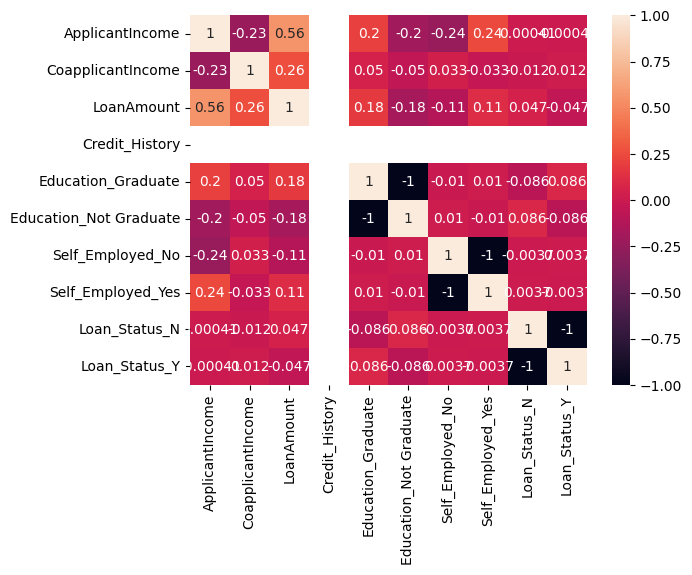

In [32]:
import seaborn as sns
sns.heatmap(corr,annot=True)